In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Wedge, Arrow
from matplotlib.collections import PatchCollection

In [12]:
def refraction_plot(time, in_angle, ref_index_1 = 1, ref_index_2 = 1.33):
    plt.figure(figsize = (12,12), dpi = 80)
    ax = plt.axes()
    plt.xticks([])
    plt.yticks([])
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['bottom'].set_position(('axes', 0.5))
    ax.spines['bottom'].set_linewidth('3.0')
    plt.xlim(-10.0, 10.0)
    plt.ylim(-10.0, 10.0)
    
    # print normal line
    plt.axvline(0, color = 'black', linestyle = '--')

    # print incident wave
    plt.arrow(-4, 4 / np.tan(in_angle), 2, -2 / np.tan(in_angle), head_width = 0.5, color = 'darkblue', linestyle = '--', alpha = 1, zorder = 3)
    x = [-8*np.sin(in_angle), 0]
    y = [8*np.cos(in_angle), 0]
    plt.plot(x,y, color = 'gray', zorder = 2)
    plt.plot([i - 3 for i in x], y, color = 'gray')
    plt.plot([i + 3 for i in x], y, color = 'gray')

    # print surface dots
    plt.scatter(np.arange(-3,3,1),[0]*6, color = 'r')

    # print incident wave's wavefront
    dy = 6 * np.cos(in_angle) * np.sin(in_angle)
    for i in range(1,13):
        tempx = []
        tempy = []
        x0 = (3 - i * (np.sin(in_angle) ** 2))
        y0 = (i * np.sin(in_angle) * np.cos(in_angle))
        tempx.append(x0)
        tempy.append(y0)
        if y0 - dy > 0:
            dx = 6 * (np.cos(in_angle) ** 2)
            tempx.append(x0 - dx)
            tempy.append(y0 - dy)
        else:
            tempx.append(3 - i)
            tempy.append(0)

        if i == 12:
            plt.annotate("t=0", (x0,y0), fontsize = 18)
        if i == 11:
            plt.annotate("t=1", (x0,y0), fontsize = 18)

        plt.plot(tempx, tempy, color = 'darkblue', linewidth = 2)

    # print surface dots'spread distance
    out_angle = np.arcsin(np.sin(in_angle) * ref_index_1 / ref_index_2)
    semicircles = []
    for i in range(2,-4,-1):
        semicircles.append(Wedge((i, 0), (3 - i) * np.sin(out_angle), 
                                 180, 360, color = 'gray', fill = False))
        ax.add_collection(PatchCollection(semicircles, match_original = True))

    # print refraction wave
    plt.arrow(2, -2 / np.tan(out_angle), 2, -2 / np.tan(out_angle), head_width = 0.5, color = 'darkgreen', linestyle = '--', alpha = 1, zorder = 3)
    x = [8*np.sin(out_angle),0]
    y = [-8*np.cos(out_angle),0]
    plt.plot(x,y, color = 'gray', zorder = 2)
    plt.plot([i - 3 for i in x], y, color = 'gray')
    plt.plot([i + 3 for i in x], y, color = 'gray')

    # print refraction wave's wavefront
    dx = 6 * (np.cos(out_angle) ** 2)
    dy = 6 * np.cos(out_angle) * np.sin(out_angle)
    for i in range(10):

        x0 = (6 + i) * (np.sin(out_angle) ** 2) - 3
        y0 = -(6 + i) * np.sin(out_angle) * np.cos(out_angle)
        plt.plot([x0, dx + x0],[y0, dy + y0],color = 'darkgreen', linewidth = 2)

    # print wavefront through time
    if time >= 12:
        x0 = (time - 12) * (np.sin(out_angle) ** 2) + 3
        y0 = -(time - 12) * np.cos(out_angle) * np.sin(out_angle)
        dx = -6 * (np.cos(out_angle) ** 2)
        dy = -6 * np.cos(out_angle) * np.sin(out_angle) 
        plt.plot([x0, dx + x0],[y0, dy + y0],color = 'darkred', linewidth = 2, zorder = 4)
        plt.annotate("t=" + str(time), (x0, y0), fontsize = 18)
    else:
        tempx = []
        tempy = []
        x0 = -(12 - time) * (np.sin(in_angle) ** 2) + 3
        y0 = (12 - time) * (np.sin(in_angle) * np.cos(in_angle))
        dx = -6 * (np.cos(in_angle) ** 2)
        dy = -6 * np.cos(in_angle) * np.sin(in_angle)
        tempx.append(x0)
        tempy.append(y0)
        if y0 + dy > 0:
            tempx.append(x0 + dx)
            tempy.append(y0 + dy)
            plt.plot(tempx, tempy, color = 'darkred', linewidth = 2, zorder = 4)
        else:
            tempx.append(time - 9)
            tempy.append(0)
            plt.plot(tempx, tempy, color = 'darkred', linewidth = 2, zorder = 4)
            plt.plot([time - 9,time - 9 - (time - 6) * np.cos(out_angle) ** 2], [0,-(time - 6) * np.cos(out_angle) * np.sin(out_angle)],
                     color = 'darkred', linewidth = 2, zorder = 4)
        plt.annotate("t=" + str(time), (x0, y0), fontsize = 18)

    plt.show()


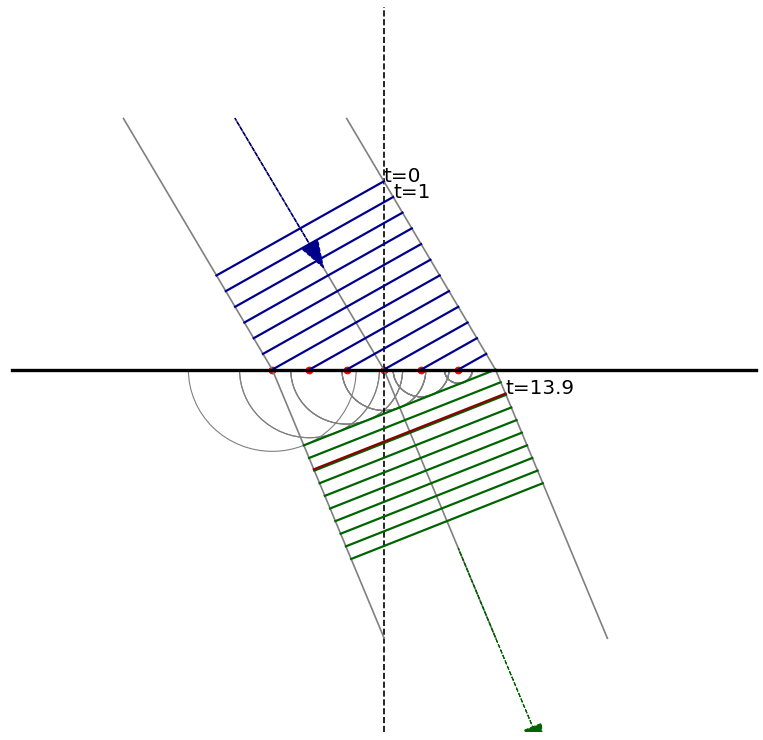

In [15]:
refraction_plot(13.9, np.pi / 6)